## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [132]:
df = pd.read_csv('QueryResults.csv', names=['Date', 'Tag', 'Posts'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [133]:
df.tail()

,Date,Tag,Posts
2798,2025-05-01 00:00:00,php,251
2799,2025-05-01 00:00:00,python,1509
2800,2025-05-01 00:00:00,r,305
2801,2025-05-01 00:00:00,ruby,29
2802,2025-05-01 00:00:00,swift,197


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [134]:
df.shape

(2803, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [135]:
df.count()

,0
Date,2803
Tag,2803
Posts,2803


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [136]:
df.groupby('Tag').sum()

,Date,Posts
Tag,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,45085
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407813
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1624342
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,814257
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52472
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74376
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1919191
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2529699
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68336


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [137]:
df.groupby('Tag').count()

,Date,Posts
Tag,,
assembly,202,202
c,202,202
c#,203,203
c++,202,202
delphi,202,202
go,187,187
java,202,202
javascript,202,202
perl,202,202


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [138]:
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Tag,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

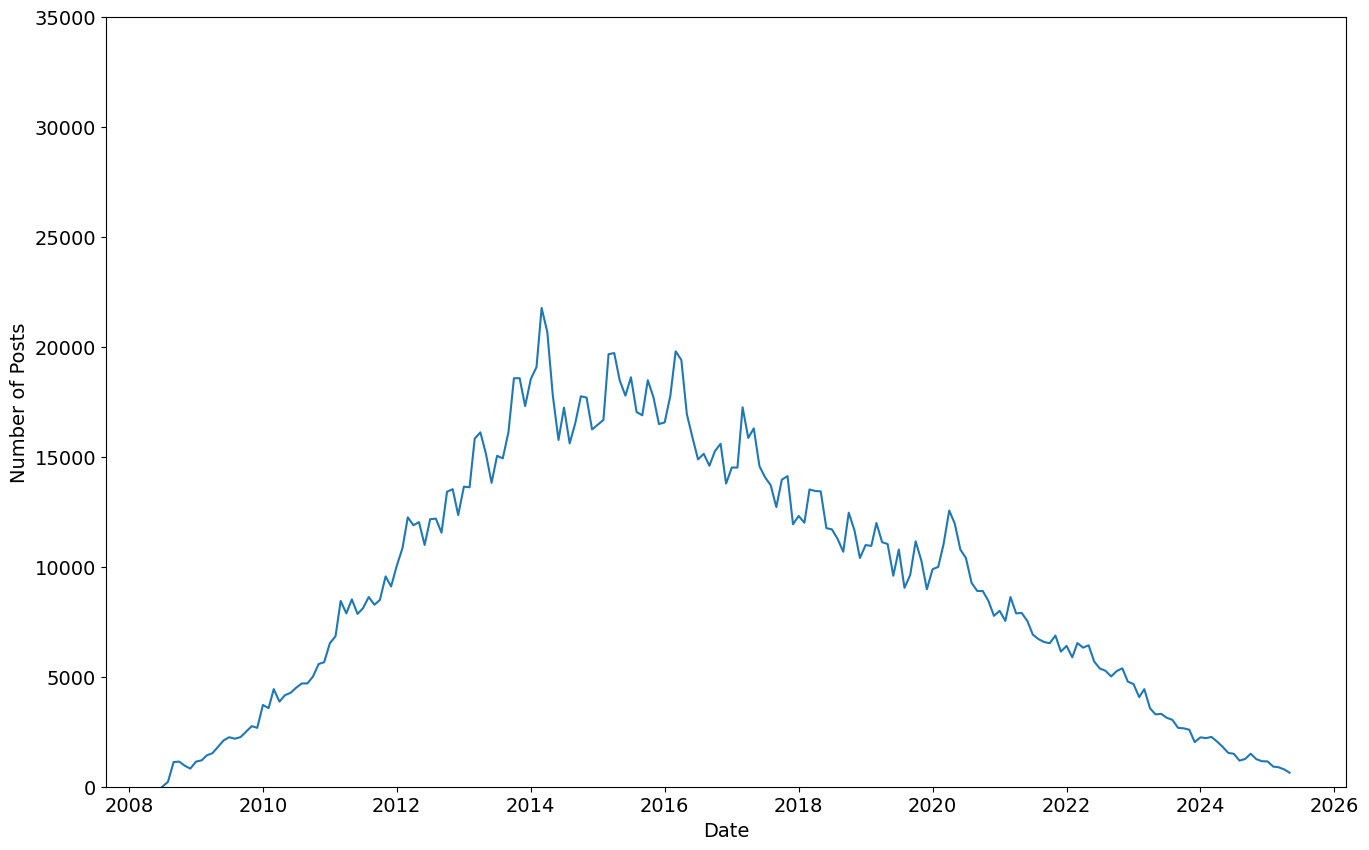

In [139]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

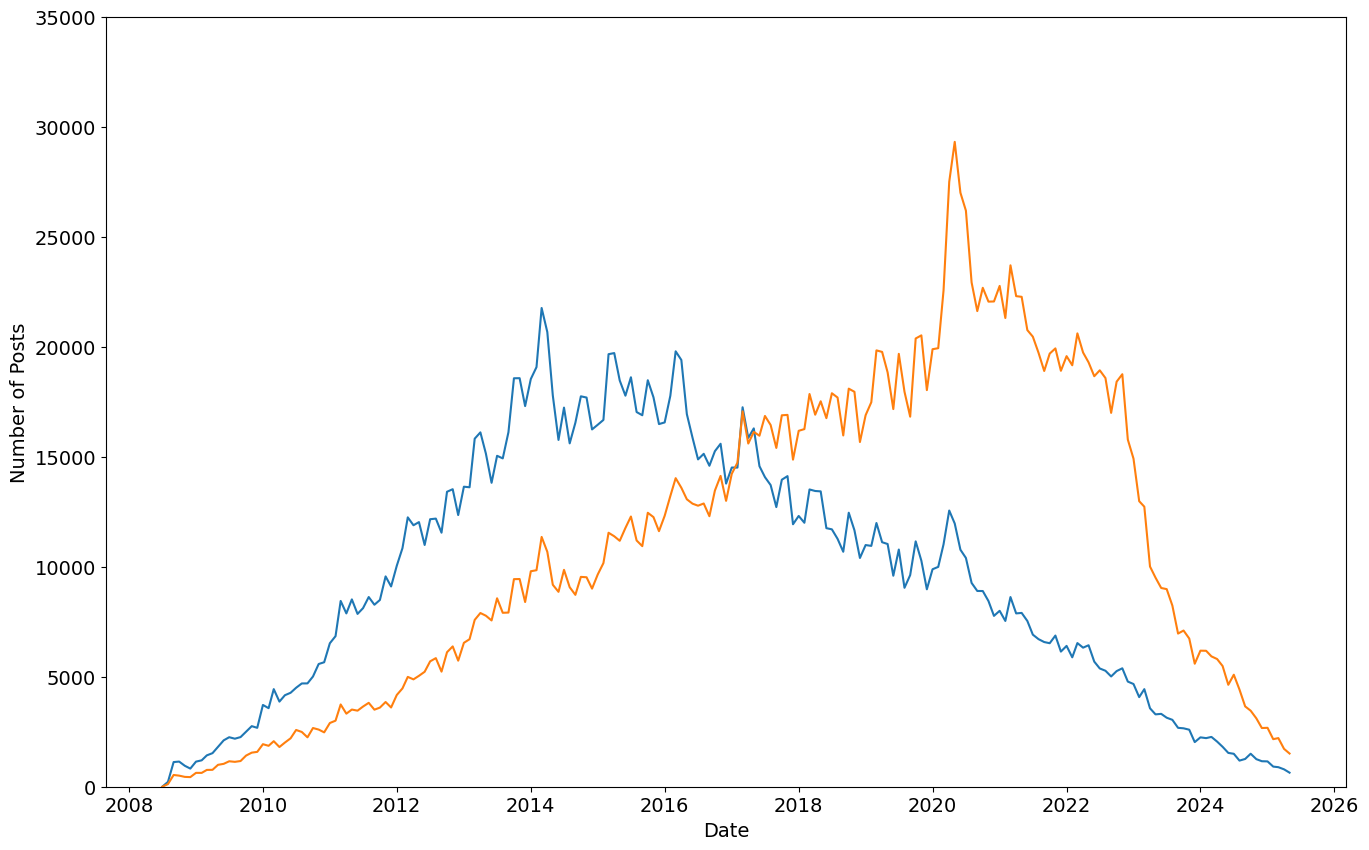

In [140]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

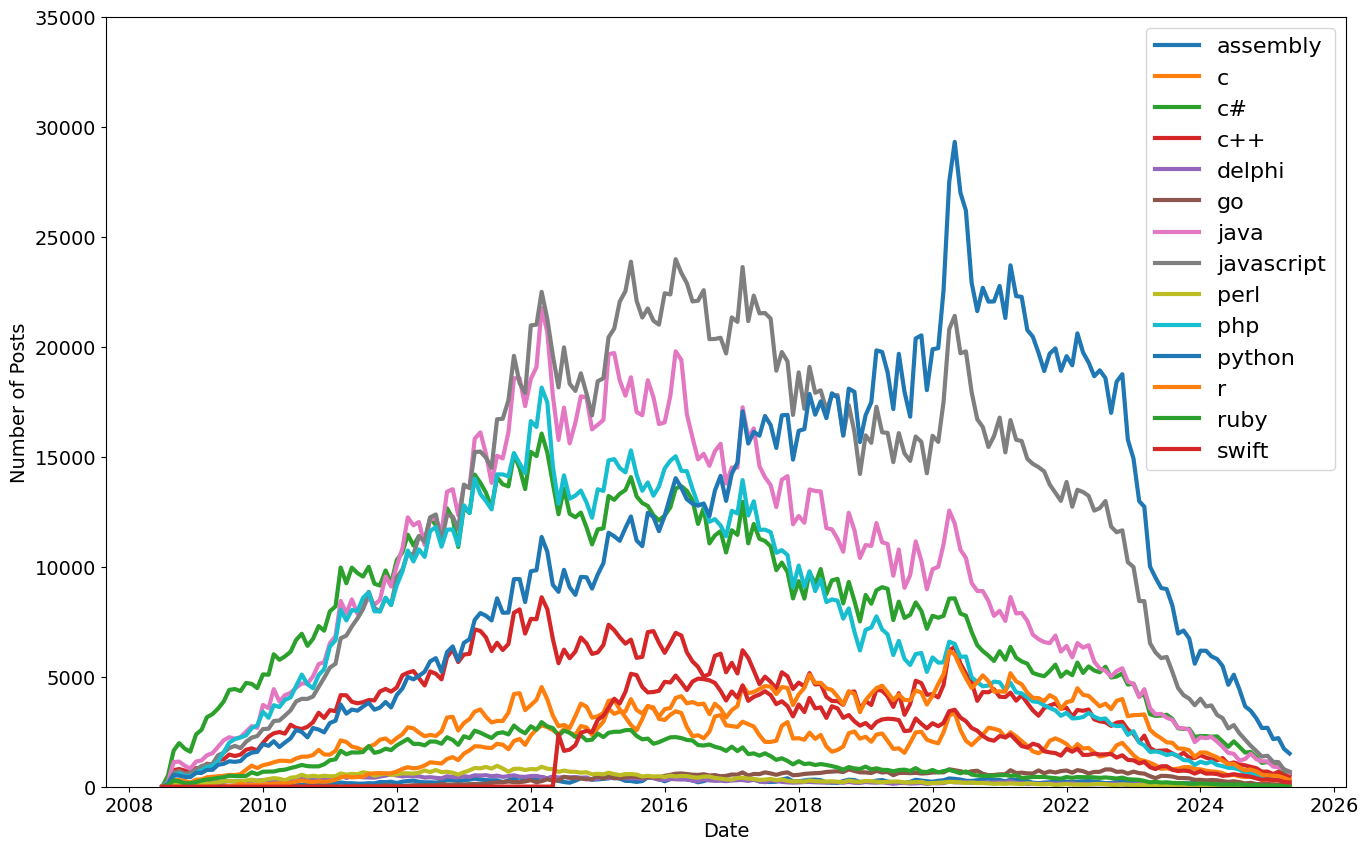

In [141]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

## Data Manipulation



In [142]:
reshaped_df = df.pivot(index='Date', columns='Tag', values='Posts')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [143]:
reshaped_df.shape

(203, 14)

In [144]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tag')

In [145]:
reshaped_df.head()

Tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,319.0,1638.0,752.0,104.0,NaN,1121.0,629.0,128.0,473.0,534.0,6.0,285.0,NaN
2008-10-01,16.0,302.0,1983.0,804.0,112.0,NaN,1143.0,720.0,128.0,602.0,504.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,952.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [146]:
reshaped_df.count()

,0
Tag,
assembly,202
c,202
c#,203
c++,202
delphi,202
go,187
java,202
javascript,202
perl,202


In [147]:
reshaped_df.fillna(0, inplace=True)

In [148]:
reshaped_df.isna().values.any()

np.False_

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

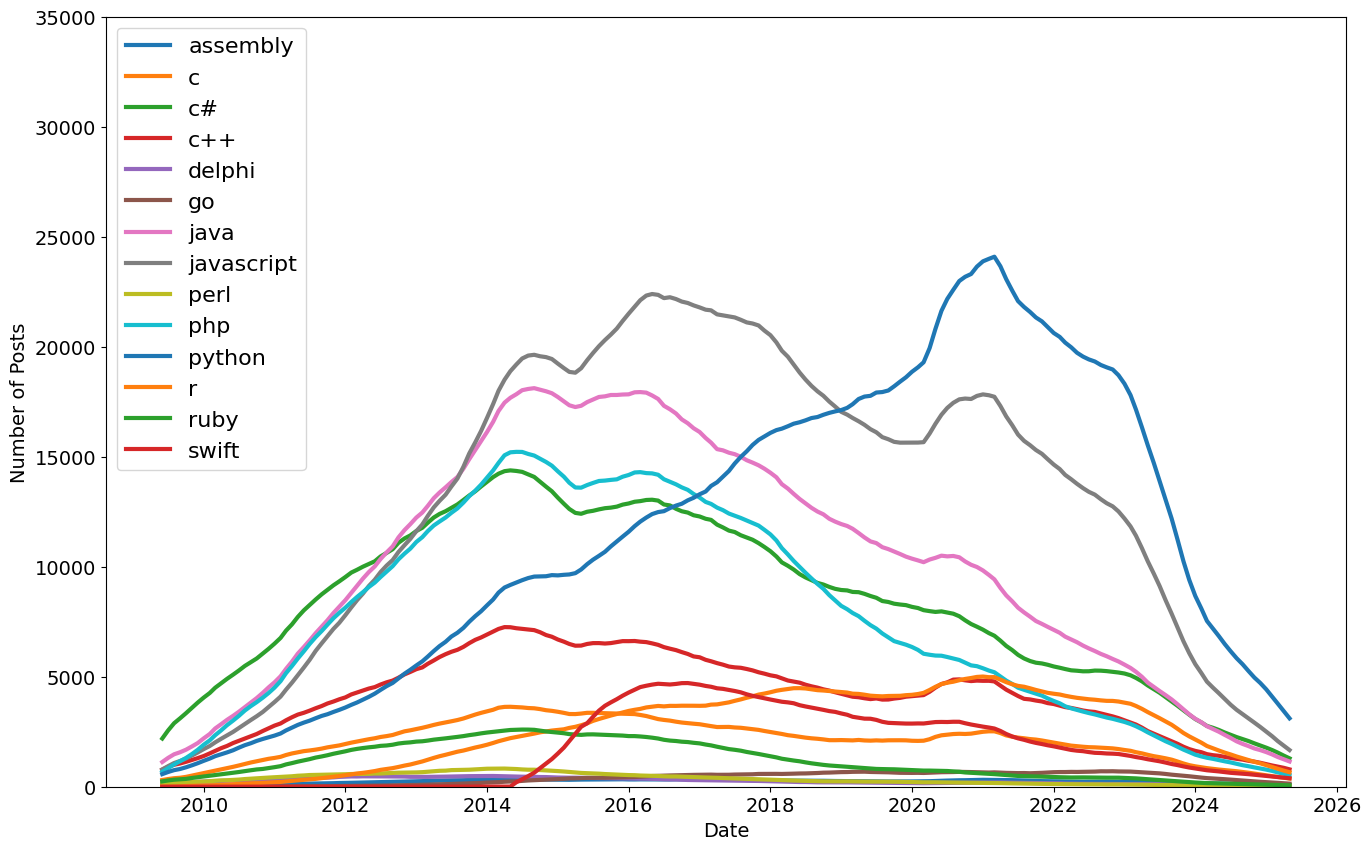

In [149]:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)